# Exploratory Data Analysis

We will carry out an exploration of the ESNLI dataset before we fine-tune the T5 model.

In [1]:
import datasets
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from datasets import load_metric

We will use the ESNLI dataset, and the one we generated during preprocessing

In [2]:
esnli = datasets.load_dataset("esnli")

Found cached dataset esnli (/Users/lorenzorota/.cache/huggingface/datasets/esnli/plain_text/0.0.2/a160e6a02bbb8d828c738918dafec4e7d298782c334b5109af632fec6d779bbc)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
esnli_red = datasets.load_from_disk("../data/esnli_reduced")

We simply generate the the class distribution bar plots

In [27]:
# this is for doing some exploratory analysis
def eda(save=False):
    doriginal = esnli['train']
    dfiltered = esnli_red['train']
    
    labels = ['neutral', 'contradiction', 'entailment', ] #(1,2,0)
    
    labels_original, values_original = zip(*Counter(doriginal['label']).items())
    labels_filtered, values_filtered = zip(*Counter(dfiltered['label']).items())
    
    indexes = np.arange(len(labels_original))
    width = 0.25

    plt.figure()

    plt.bar(indexes, values_original, align='edge', width=width, color='C0', label='Training split original')
    plt.bar(indexes+width, values_filtered, align='edge', width=width, color='C1', label='Training split filtered')
    
    plt.xticks(indexes + width, labels)
    plt.title("Dataset training split class distribution")
    plt.ylabel('Number of examples')
    plt.legend(loc='lower right')
    
    if save:
        plt.savefig('class-distribution.pdf', bbox_inches='tight')
    plt.show()

Number of rows in original training split: 549367
Number of rows in filtered training split: 533118
Percentage of filtered examples: 2.9577677581653066


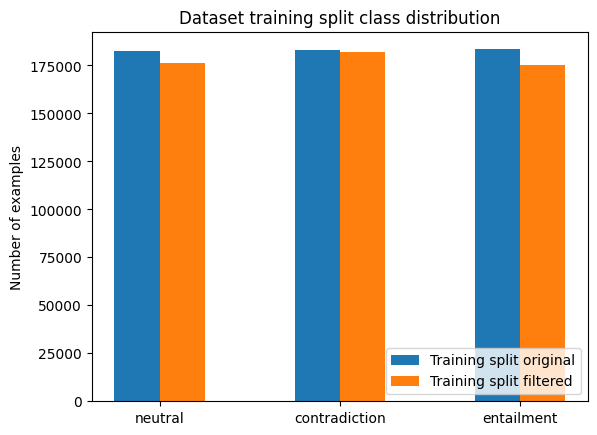

In [29]:
print('Number of rows in original training split:',len(doriginal))
print('Number of rows in filtered training split:',len(dfiltered))
print('Percentage of filtered examples:', (len(doriginal) - len(dfiltered))/len(doriginal)*100)

eda()